In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

url='https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF=pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# 탐색적 데이터 분석

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## 전체 의료비 분포

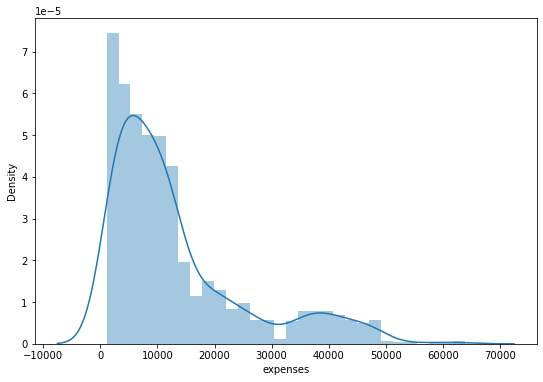

In [5]:
plt.figure(figsize=(9,6))
sns.distplot(DF.expenses,
             hist=True,
             kde=True)
plt.show()

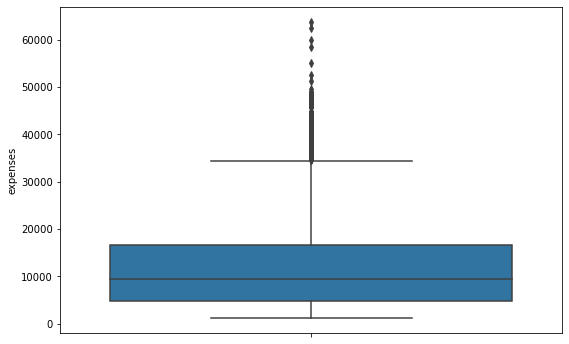

In [6]:
plt.figure(figsize=(9,6))
sns.boxplot(y='expenses',data=DF)
plt.show()

## 성별 별 의료비 분포

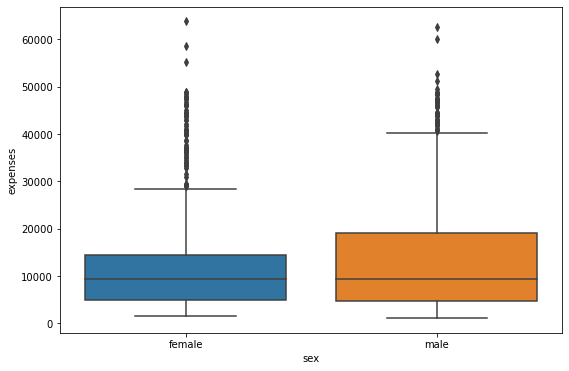

In [7]:
plt.figure(figsize=(9,6))
sns.boxplot(x='sex',y='expenses',data=DF)
plt.show()

In [8]:
DF.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

## 자녀수 별 의료비 분포

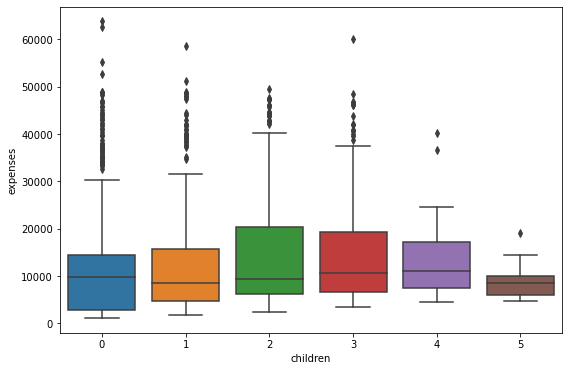

In [9]:
plt.figure(figsize=(9,6))
sns.boxplot(x='children',y='expenses',data=DF)
plt.show()

In [10]:
DF.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## 흡연여부 별 의료비 분포

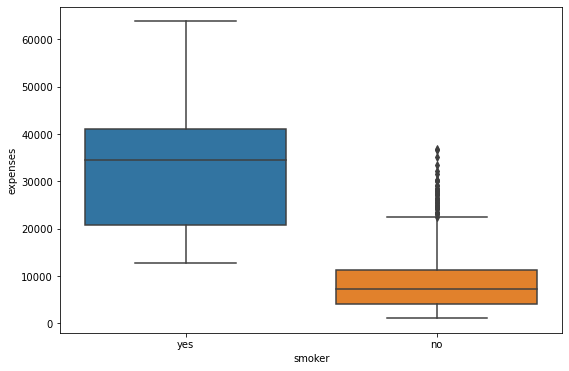

In [11]:
plt.figure(figsize=(9,6))
sns.boxplot(x='smoker',y='expenses',data=DF)
plt.show()

In [12]:
DF.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

## 거주지역 별 의료비 분포

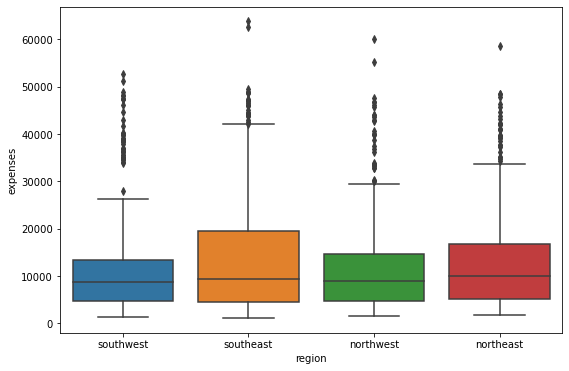

In [13]:
plt.figure(figsize=(9,6))
sns.boxplot(x='region',y='expenses',data=DF)
plt.show()

In [14]:
DF.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## BMI 분포 및 의료비와의 관계

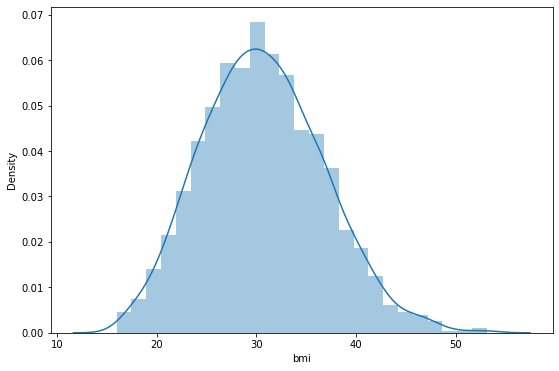

In [15]:
plt.figure(figsize=(9,6))
sns.distplot(DF.bmi,
             hist=True,
             kde=True)
plt.show()

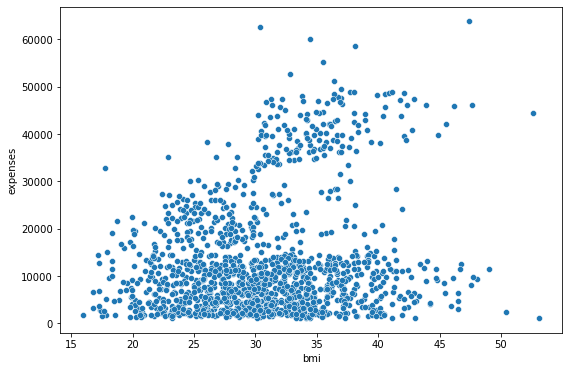

In [16]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.bmi,y=DF.expenses)
plt.show()

# Modeling - sklearn Package

## integer Encoding

In [17]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder

encoder1=LabelEncoder()
DF['sex']=encoder1.fit_transform(DF.sex)

In [20]:
encoder2=LabelEncoder()
DF['smoker']=encoder2.fit_transform(DF.smoker)

In [19]:
encoder3=LabelEncoder()
DF['region']=encoder3.fit_transform(DF.region)

In [21]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [22]:
DF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Train & Test Array Split(7:3)

In [23]:
from sklearn.model_selection import train_test_split

X=DF[['age','sex']]
y=DF['expenses']

X_train, X_test, y_train,y_test=train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=2045)

print('Train Data : ',X_train.shape,y_train.shape)
print('Test Data : ',X_test.shape,y_test.shape)

Train Data :  (936, 2) (936,)
Test Data :  (402, 2) (402,)


## .fit() 

In [24]:
from sklearn.linear_model import LinearRegression

RA=LinearRegression()
RA.fit(X_train,y_train)

LinearRegression()

## .predict() 

In [25]:
y_hat=RA.predict(X_test)

## 오차(Error)값 확인

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse2=mean_squared_error(y_test, y_hat)

np.sqrt(mse2)

10633.607635499551

# Modeling - statsmodels Pakage 

In [27]:
import pandas as pd

url='https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF=pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF,
                                       test_size=0.3,
                                       random_state=2045)

train_set.shape, test_set.shape

((936, 7), (402, 7))

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 8 to 887
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   expenses  936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


## expenses ~ age + sex 

In [32]:
import statsmodels.formula.api as smf

Model_1=smf.ols(formula='expenses ~ age + sex',
                data=train_set).fit()

## y_hat 생성

In [33]:
y_hat_1=Model_1.predict(test_set[['age','sex']])

## 오차(Error)값 확인

In [34]:
mse1=mean_squared_error(test_set.expenses,y_hat_1)

np.sqrt(mse1)

10633.607635499555

# Package별 오차값 비교 

In [36]:
print('statsmodels : ',np.sqrt(mse1))
print('sklearn     : ',np.sqrt(mse2))

statsmodels :  10633.607635499555
sklearn     :  10633.607635499551


#The end#